<a href="https://colab.research.google.com/github/alifele/Neuro_Science/blob/master/Neuro_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
% ls

drive/  sample_data/


In [5]:
% cd 'My Drive'
% ls

/content/drive/My Drive
'ALI FELE PARANJ.pdf'
'apply for cern (with help of GOD)'/
 arr_0.npy
 arr_1.npy
'assignment_4 - ali fele.ipynb'
 assignment_4.ipynb
'Assignment_5 - ali fele.ipynb'
 Assignment_5.ipynb
'Booking form Summer Students Non-Member States 2019 (1).gdoc'
'Booking form Summer Students Non-Member States 2019.gdoc'
 BOOKS/
'CERN Application doc'/
 Cheat_Sheets/
 Classroom/
'Colab Notebooks'/
'Copy_of_First_Assignment - ali fele.ipynb'
 Copy_of_First_Assignment.ipynb
 dataset_train.xlsx
 I-V.xlsx
'MUSIC AND VIDEOS'/
 myfile.txt
'Pulsatile Heart pump'/
 Untitled0.ipynb
 Untitled22.ipynb
'Untitled23 (1).ipynb'
'Untitled document (1).gdoc'
'Untitled document.gdoc'
'Untitled form.gform'


In [14]:
Data = np.load('arr_0.npy')
tar = np.load('arr_1.npy')
y = tar[2,:]
y.shape

(4802,)

In [15]:
print('the shape of X is : {}'.format(Data.shape))
print('the shape of y is : {}'.format(y.shape))

the shape of X is : (4802, 1300)
the shape of y is : (4802,)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import io, requests
import pandas as pd

<BarContainer object of 60 artists>

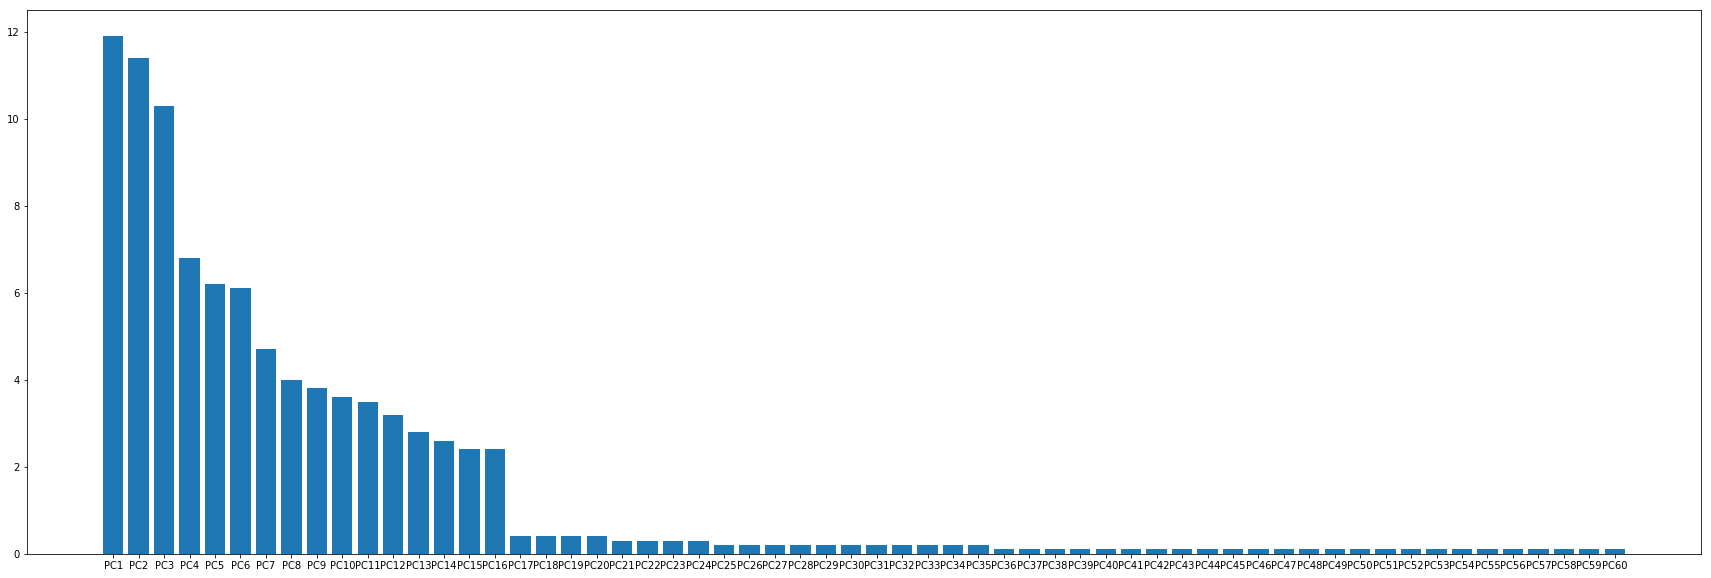

In [21]:
X = Data
from sklearn.decomposition import PCA
n = 60
pca = PCA(n)
pca.fit(X)
pca_data = pca.transform(X)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(i) for i in range (1,len(per_var)+1)]
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(111)
ax.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

In [22]:
n_pca = 35
pca = PCA(n_pca)
pca.fit(X)
pca_features = pca.transform(X)
print('the shape of pca_featuers is : {}'.format(pca_features.shape))

the shape of pca_featuers is : (4802, 35)


In [0]:
pcaed_X = pca_features

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pcaed_X, y, shuffle=True)

#Implementing Machine Learning Classification Algorithms

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

##Support Vector Machine

In [28]:
svc_clf = SVC()
svc_clf.fit(X_train,Y_train)
print("The accurace of the SVM classifier is: {}".format( svc_clf.score(X_test,Y_test) ) )
# print("The coeeficients of the best fit are: {} and the intercept is:{} ".format( svc_clf.coef_, svc_clf.intercept_ ) )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accurace of the SVM classifier is: 0.829308909242298


In [29]:
Y_predict_SVM = svc_clf.predict(X_test)
cnfmatrix_SVM = confusion_matrix(Y_test,Y_predict_SVM)
print(cnfmatrix_SVM)

[[ 38   0  69   6]
 [  0 348   0 110]
 [  6   0 114  14]
 [  0   0   0 496]]


##K Nearst Neigbors Classifier

In [30]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)
print("The accuracy of the knn classifier is: {}".format( knn_clf.score(X_test,Y_test) ) )

The accuracy of the knn classifier is: 0.829308909242298


In [31]:
Y_predict_KNN = knn_clf.predict(X_test)
cnfmatrix_KNN = confusion_matrix(Y_test,Y_predict_KNN)
print(cnfmatrix_KNN)

[[ 43  11  59   0]
 [  5 451   0   2]
 [ 17   8  82  27]
 [  0  73   3 420]]


##Decision Tree

In [32]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,Y_train)
print("The accuracy of the tree classifier is: {}".format( tree_clf.score(X_test,Y_test) ) )

The accuracy of the tree classifier is: 0.8967527060782681


In [33]:
Y_predict_tree = tree_clf.predict(X_test)
cnfmatrix_tree = confusion_matrix(Y_test,Y_predict_tree)
print(cnfmatrix_tree)

[[ 99   4  10   0]
 [  0 456   0   2]
 [ 74   0  48  12]
 [  0  12  10 474]]


##Bayes

In [34]:
nb_clf = GaussianNB()
nb_clf.fit(X_train,Y_train)
print("The accuracy of the knn classifier is: {}".format( nb_clf.score(X_test,Y_test) ) )

The accuracy of the knn classifier is: 0.6461282264779351


In [35]:
Y_predict_nb = nb_clf.predict(X_test)
cnfmatrix_nb = confusion_matrix(Y_test,Y_predict_tree)
print(cnfmatrix_nb)

[[ 99   4  10   0]
 [  0 456   0   2]
 [ 74   0  48  12]
 [  0  12  10 474]]


##Voting Classifier(Hard voting)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [0]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()



In [0]:
voting_clf = VotingClassifier(  estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              voting='hard')

In [47]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

LogisticRegression 0.7335553705245629
RandomForestClassifier 0.922564529558701
SVC 0.829308909242298
VotingClassifier 0.9050791007493755


In [48]:
Y_predict_nb = voting_clf.predict(X_test)
cnfmatrix_nb = confusion_matrix(Y_test,Y_predict_tree)
print(cnfmatrix_nb)

[[ 99   4  10   0]
 [  0 456   0   2]
 [ 74   0  48  12]
 [  0  12  10 474]]


##Neural Network

In [50]:
from tensorflow import keras
from keras.layers import Flatten, Dense, Dropout

Using TensorFlow backend.


In [53]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,y)
X_Train.shape

(3601, 1300)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
    
])

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1300)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               666112    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [82]:
his = model.fit(X_Train, Y_Train)

ValueError: ignored

In [81]:
Counter(y)

Counter({1.0: 458, 2.0: 1888, 3.0: 488, 4.0: 1968})

In [77]:
Y_Train.dtype(int)

TypeError: ignored